In [ ]:
#pip install opencv-python

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import  pandas as pd
import cv2
from PIL import Image
from tensorflow import keras
from keras import layers as tfl
from keras import layers, models, optimizers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization

In [2]:
base_dir = '/kaggle/input/cars-wagonr-swift/data/'
train_swift = os.listdir(os.path.join(base_dir, 'train/swift') )
val_swift  = os.listdir(os.path.join(base_dir, 'validation/swift') )
test_swift  =  os.listdir(os.path.join(base_dir, 'test/swift') )
print('Instances for Class Swift: Train {}, Validation {} Test {}'.format(len(train_swift), len(val_swift), len(test_swift)))

Instances for Class Swift: Train 1200, Validation 400 Test 400


In [3]:
train_swift[2]

'1lifg37rh4oq1-IN.jpg'

In [4]:
train_wr = os.listdir(os.path.join(base_dir, 'train/wagonr') )
val_wr  = os.listdir(os.path.join(base_dir, 'validation/wagonr') )
test_wr  =  os.listdir(os.path.join(base_dir, 'test/wagonr') )
print('Instances for Class Wagonr: Train {}, Validation {} Test {}'.format(len(train_swift), len(val_swift), len(test_swift)))

Instances for Class Wagonr: Train 1200, Validation 400 Test 400


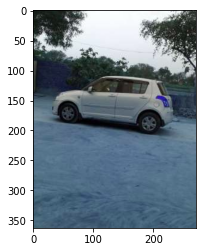

In [5]:

image = cv2.imread('/kaggle/input/cars-wagonr-swift/data/train/swift/'+train_swift[2])
plt.imshow(image)

In [6]:
train_wr[2]

'clzhprbhifj02-IN.jpg'

In [8]:

wagonr_path = []
wagonr_labels = []

for i in train_wr:
    wagonr_labels.append("wagonr")
    print(i)
    wagonr_path .append('/kaggle/input/cars-wagonr-swift/data/train/wagonr/'+i)
return wagonr_path, wagonr_labels

3fgdqneqifeb1-IN.jpg
0acu7kyb92h31-IN.jpg
clzhprbhifj02-IN.jpg
pk589sujmty82-IN.jpg
phneyc6jwgvh1-IN.jpg
53kk6zvnts9o3-IN.jpg
ypfb4lb0c5lh1-IN.jpg
6rg90bxbejsw-IN.jpg
cvts0irxpegj-IN.jpg
v3md6cxdd12l-IN.jpg
ysce7n6m8m7n3-IN.jpg
jhtpe7xekjk01-IN.jpg
yv33nkcnkkwq2-IN.jpg
x8wmsuxidg8p2-IN.jpg
4brf5g7g4jzz1-IN.jpg
gkl276xnfjoo1-IN.jpg
d6icp5tykjt91-IN.jpg
6llrzty3znxu-IN.jpg
4qd9abmjheu03-IN.jpg
tdqf9htfda5l-IN.jpg
waozhyfhfbrf1-IN.jpg
zy6gqvojbg3g3-IN.jpg
w7akkddfpbcr3-IN.jpg
sk3m5orpgbm52-IN.jpg
wjpf2zdr64rd2-IN.jpg
y9yt65wb7d1f2-IN.jpg
enrfyvv0b2x2-IN.jpg
7xwpq0qr46p62-IN.jpg
ip3yi3pfniza1-IN.jpg
p1zvlxwmt3g3-IN.jpg
nhdwwfx1ethh3-IN.jpg
x9u5p6qdlljg3-IN.jpg
smr0n3gxtl72-IN.jpg
7l355f498ypv1-IN.jpg
2oe07m8b68822-IN.jpg
ci9wozsdos853-IN.jpg
sr34llom13uu3-IN.jpg
4i1z1x497t8k2-IN.jpg
u1weflar48pj2-IN.jpg
zk3etzh75mh61-IN.jpg
xiae9jl58igk3-IN.jpg
1hggmi9usbbk3-IN.jpg
bt06jgim76pt2-IN.jpg
c5nhq8ioc5yg1-IN.jpg
5lv7qe1xojsg3-IN.jpg
uwt82ltjveu22-IN.jpg
t6kdgggy4h5q2-IN.jpg
4jeo35gvc1zr-IN.jpg
3

SyntaxError: 'return' outside function (4252921246.py, line 8)

In [9]:
wagonr_path[2],wagonr_labels[2]

('/kaggle/input/cars-wagonr-swift/data/train/wagonr/clzhprbhifj02-IN.jpg',
 'wagonr')

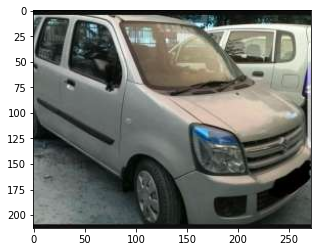

In [10]:
image = cv2.imread(wagonr_path[2])
plt.imshow(image)

In [11]:

swift_path = []
swift_labels = []

for i in train_swift:
    swift_labels.append("swift")
    print(i)
    swift_path.append('/kaggle/input/cars-wagonr-swift/data/train/swift/'+i)
return swift_path, swift_labels

29kmbp7iuiuy-IN.jpg
eka752qj19qc2-IN.jpg
1lifg37rh4oq1-IN.jpg
m6ipasemx0ih-IN.jpg
gx1tzhe6o3f5-IN.jpg
igyfskcfngl22-IN.jpg
ffqlwwqt3b9s2-IN.jpg
u1cbu4o1jskx2-IN.jpg
2n0uuvmu9h5l1-IN.jpg
1ol6ntnr3136-IN.jpg
ubvu29hli1mp2-IN.jpg
boucd8cnhal81-IN.jpg
60537aahxkhv2-IN.jpg
cwf8s7l35k6v-IN.jpg
y4xqy3n91rvg1-IN.jpg
jtxnn2wrid5v2-IN.jpg
kuiregr3l3we1-IN.jpg
6vuc9u6rfvha3-IN.jpg
xb84dmslk67l1-IN.jpg
y8xvfqg2wy501-IN.jpg
xqrbeefz0yfz2-IN.jpg
gh8bax37rdm2-IN.jpg
uv9wz3auaa4a1-IN.jpg
zh7gj1v26viz-IN.jpg
ozv04dwap1cw2-IN.jpg
bcpryx7ckz253-IN.jpg
x11z437xwoos3-IN.jpg
7irrx9rurr8i3-IN.jpg
hfndbgiwlbt52-IN.jpg
kltii4gz3t051-IN.jpg
4mk3hfgp8kgo2-IN.jpg
k4py116bpypr2-IN.jpg
oscjhot5fn8-IN.jpg
awhk7tgjno1y1-IN.jpg
apigbtbfgqty2-IN.jpg
x9i8j61vxyu73-IN.jpg
rrfggbrpdk3e-IN.jpg
79ju2abn6lu21-IN.jpg
nw3odepxta9k-IN.jpg
y8yrlcj6s02d3-IN.jpg
9wgizcbhq5nq-IN.jpg
gwkpye1t3k561-IN.jpg
k3nl354gtc77-IN.jpg
dtzl02omkh173-IN.jpg
4apdtp6p41gc-IN.jpg
8d9jyyn57cgy1-IN.jpg
p43hh7qdtni91-IN.jpg
3l5zosj7bsrf1-IN.jpg
r65e5h

SyntaxError: 'return' outside function (3577670848.py, line 8)

In [12]:
print(swift_path[2],"&",swift_labels[2])
print(len(swift_path),len(swift_labels))

/kaggle/input/cars-wagonr-swift/data/train/swift/1lifg37rh4oq1-IN.jpg & swift
1200 1200


In [13]:
vwagonr_path = []
vwagonr_labels = []

for i in val_wr:
    vwagonr_labels.append("wagonr")
    print(i)
    vwagonr_path .append('/kaggle/input/cars-wagonr-swift/data/validation/wagonr/'+i)
return vwagonr_path, vwagonr_labels

5po126ogmroq1-IN.jpg
lh3gw66xl49i1-IN.jpg
19e2jsh4uw351-IN.jpg
jt6zhet0n4ia-IN.jpg
booots6ncow4-IN.jpg
rs2rja812e1q3-IN.jpg
ujh6oiwne1yt3-IN.jpg
o6hk586pxuzs1-IN.jpg
wobnul3rs0c51-IN.jpg
tn5bdz2jp5we-IN.jpg
fjeukvt2egwo3-IN.jpg
nodxljlq2k0c3-IN.jpg
c1wxchjpyv5z-IN.jpg
1kqhgy3ju4t62-IN.jpg
vdgorwntj4zv3-IN.jpg
chuejfyojts51-IN.jpg
qtjoxonmz12o-IN.jpg
siqujmjml1uo2-IN.jpg
w0kmxxv7zpzs3-IN.jpg
rj0226cxjxhb2-IN.jpg
1eqx4get519a-IN.jpg
jm0p2qzkio3g2-IN.jpg
c3oty19l3koj1-IN.jpg
hdz5xgs2zstr3-IN.jpg
4ulinnts67ut1-IN.jpg
9udud0mb93gh2-IN.jpg
bqownawbphs32-IN.jpg
n9vd2y8wks3w-IN.jpg
kpuahvhsayge-IN.jpg
gqiszhfw3j3s3-IN.jpg
wv10vu0kjdo72-IN.jpg
pr7qc0snt7my1-IN.jpg
zc9yiq7y76xz-IN.jpg
92vntt71d4fm1-IN.jpg
fdrenmdxq05e2-IN.jpg
x3u3anhln7x3-IN.jpg
c905qwiz45e-IN.jpg
dhrfee8t3r901-IN.jpg
2r6isomj6u3t3-IN.jpg
j9uaar7tor5l-IN.jpg
r07n72mhygkl1-IN.jpg
6of545r9mxkb3-IN.jpg
kulkooz3nr8b2-IN.jpg
gchbss3h76ty1-IN.jpg
bre2hpyojvz02-IN.jpg
3msl54nly1pk2-IN.jpg
quu9ntarhf0p2-IN.jpg
uejcif6x33oq-IN.jpg
xn5lgj

SyntaxError: 'return' outside function (2717574503.py, line 8)

In [14]:
vswift_path = []
vswift_labels = []

for i in val_swift:
    vswift_labels.append("swift")
    print(i)
    vswift_path.append('/kaggle/input/cars-wagonr-swift/data/validation/swift/'+i)
return vswift_path, vswift_labels

w61hn1imnxif2-IN.jpg
12h6nwa46mus2-IN.jpg
j33i0kl6abqg3-IN.jpg
nel31ofpl36w-IN.jpg
8ewq3wwcf1ac-IN.jpg
y1jdgjir06rq3-IN.jpg
bn6j90wprrsy-IN.jpg
m7oieukmhk7y-IN.jpg
m5s8tl2e8p5y1-IN.jpg
5rfbj2518mxg1-IN.jpg
hfe15egh93k71-IN.jpg
6bqw2sgb9ri7-IN.jpg
ddnrkitqxzig3-IN.jpg
on6zsma92tgw1-IN.jpg
e4tcfp9hmihn3-IN.jpg
jumtjmsb67ie3-IN.jpg
72oexxup9rin-IN.jpg
0vqw6jak721b2-IN.jpg
djig0uyia31-IN.jpg
e9wc0so1skem1-IN.jpg
dbfvletb3r1y-IN.jpg
bf01uj2rmu7y1-IN.jpg
12cspc7ckffb-IN.jpg
v9vfc3yxq1691-IN.jpg
d53ztpcpu6qh3-IN.jpg
c77smyarq10j-IN.jpg
34nap9yujx432-IN.jpg
crxilwzldbxx1-IN.jpg
z1ispkse7jj52-IN.jpg
ne9xy0ntpgtq3-IN.jpg
x3wrm6hvin8r2-IN.jpg
l8xp0pnrssa31-IN.jpg
dp6nopn9oa92-IN.jpg
3dn9ehm9h1e9-IN.jpg
jofmsogenakk2-IN.jpg
wgz42xd49yy11-IN.jpg
2ury547vs6zo3-IN.jpg
krrmrzyjqm9v-IN.jpg
svqqgc5yzzdy1-IN.jpg
5qeg34nvxbkl-IN.jpg
4vok78vuuv9d2-IN.jpg
z80eow9x499s3-IN.jpg
kzy5abzjdar91-IN.jpg
tteza0vbaisa3-IN.jpg
r2b6ll5c6faq-IN.jpg
uqtqk9p56a1d-IN.jpg
863ycntdpky41-IN.jpg
njot3zhnpkie2-IN.jpg
d261exa6w

SyntaxError: 'return' outside function (3014106071.py, line 8)

In [15]:
cars_path_l=(vswift_path, vswift_labels,vwagonr_path, vwagonr_labels,swift_path, swift_labels,wagonr_path, wagonr_labels)
for i in cars_path_l:
    print('Sizes number ={}'.format(len(i)))

Sizes number =400
Sizes number =400
Sizes number =400
Sizes number =400
Sizes number =1200
Sizes number =1200
Sizes number =1200
Sizes number =1200


In [16]:
vswift_path[2]

'/kaggle/input/cars-wagonr-swift/data/validation/swift/j33i0kl6abqg3-IN.jpg'

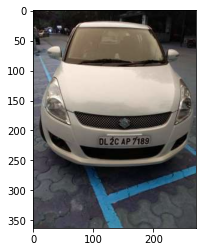

In [17]:
image = cv2.imread(vswift_path[2])
plt.imshow(image)

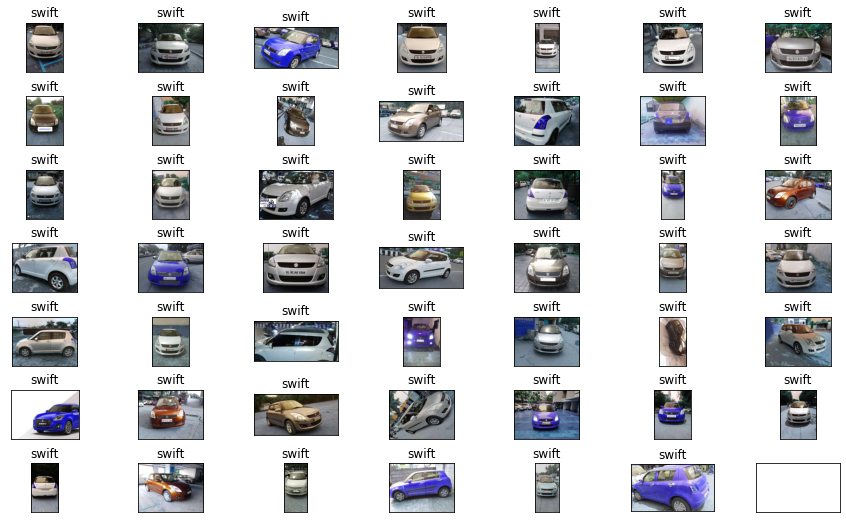

In [19]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    image = cv2.imread(vswift_path[n])
    #image=image/255.
    plt.imshow(image)
    plt.title(vswift_labels[n])   
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)   
    plt.xticks([]) , plt.yticks([])    
plt.show()

In [20]:
cars_path_l=(vswift_path,vwagonr_path,swift_path,wagonr_path)
cars_path_l[0]

['/kaggle/input/cars-wagonr-swift/data/validation/swift/w61hn1imnxif2-IN.jpg',
 '/kaggle/input/cars-wagonr-swift/data/validation/swift/12h6nwa46mus2-IN.jpg',
 '/kaggle/input/cars-wagonr-swift/data/validation/swift/j33i0kl6abqg3-IN.jpg',
 '/kaggle/input/cars-wagonr-swift/data/validation/swift/nel31ofpl36w-IN.jpg',
 '/kaggle/input/cars-wagonr-swift/data/validation/swift/8ewq3wwcf1ac-IN.jpg',
 '/kaggle/input/cars-wagonr-swift/data/validation/swift/y1jdgjir06rq3-IN.jpg',
 '/kaggle/input/cars-wagonr-swift/data/validation/swift/bn6j90wprrsy-IN.jpg',
 '/kaggle/input/cars-wagonr-swift/data/validation/swift/m7oieukmhk7y-IN.jpg',
 '/kaggle/input/cars-wagonr-swift/data/validation/swift/m5s8tl2e8p5y1-IN.jpg',
 '/kaggle/input/cars-wagonr-swift/data/validation/swift/5rfbj2518mxg1-IN.jpg',
 '/kaggle/input/cars-wagonr-swift/data/validation/swift/hfe15egh93k71-IN.jpg',
 '/kaggle/input/cars-wagonr-swift/data/validation/swift/6bqw2sgb9ri7-IN.jpg',
 '/kaggle/input/cars-wagonr-swift/data/validation/swift/d

In [21]:
vsdata = []
vwdata=[]
sdata = []
wdata=[]

In [22]:
width = 50
height = 50
dim = (width, height)

In [26]:
cars_path_l=(vswift_path,vwagonr_path,swift_path,wagonr_path)
cars_data=(vsdata,vwdata,sdata,wdata)
a=[]
for i in cars_path_l[0]:    
    image=cv2.imread(i)
    #image = cv2.fromarray(image , 'RGB')
    image= cv2.resize(image,dim)
    vsdata.append(image)     
   



In [25]:
a[2].shape

(50, 50, 3)

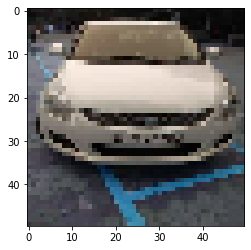

In [27]:
plt.imshow(vsdata[2])

In [28]:
for i in cars_path_l[1]:
    image=cv2.imread(i)
    #image = Image.fromarray(image , 'RGB')
    image= cv2.resize(image,dim)
    vwdata.append(image)
                

In [29]:
cars_path_l[1]

['/kaggle/input/cars-wagonr-swift/data/validation/wagonr/5po126ogmroq1-IN.jpg',
 '/kaggle/input/cars-wagonr-swift/data/validation/wagonr/lh3gw66xl49i1-IN.jpg',
 '/kaggle/input/cars-wagonr-swift/data/validation/wagonr/19e2jsh4uw351-IN.jpg',
 '/kaggle/input/cars-wagonr-swift/data/validation/wagonr/jt6zhet0n4ia-IN.jpg',
 '/kaggle/input/cars-wagonr-swift/data/validation/wagonr/booots6ncow4-IN.jpg',
 '/kaggle/input/cars-wagonr-swift/data/validation/wagonr/rs2rja812e1q3-IN.jpg',
 '/kaggle/input/cars-wagonr-swift/data/validation/wagonr/ujh6oiwne1yt3-IN.jpg',
 '/kaggle/input/cars-wagonr-swift/data/validation/wagonr/o6hk586pxuzs1-IN.jpg',
 '/kaggle/input/cars-wagonr-swift/data/validation/wagonr/wobnul3rs0c51-IN.jpg',
 '/kaggle/input/cars-wagonr-swift/data/validation/wagonr/tn5bdz2jp5we-IN.jpg',
 '/kaggle/input/cars-wagonr-swift/data/validation/wagonr/fjeukvt2egwo3-IN.jpg',
 '/kaggle/input/cars-wagonr-swift/data/validation/wagonr/nodxljlq2k0c3-IN.jpg',
 '/kaggle/input/cars-wagonr-swift/data/vali

(400, <matplotlib.image.AxesImage at 0x7f6d30185210>)

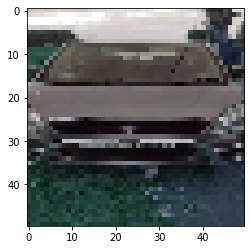

In [30]:
len(vwdata),plt.imshow(vwdata[2])

In [31]:
for i in cars_path_l[2]:
    image=cv2.imread(i)
    #image = Image.fromarray(image , 'RGB')
    image= cv2.resize(image,dim)
    sdata.append(image)
                       

In [32]:
 for i in cars_path_l[3]:
    image=cv2.imread(i)
    #image = Image.fromarray(image , 'RGB')
    image= cv2.resize(image,dim)
    wdata.append(image)

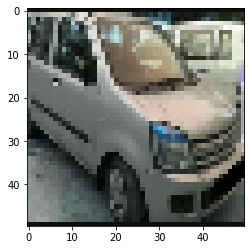

In [41]:
plt.imshow(wdata[2])

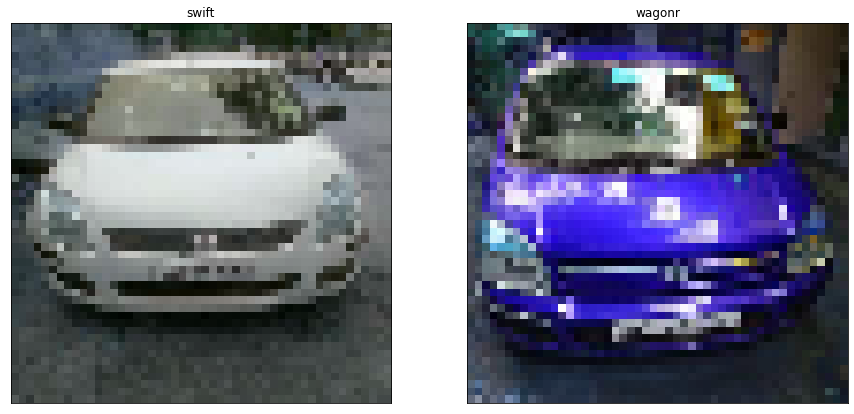

In [33]:
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(vsdata[0])
plt.title(vswift_labels[0])
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(vwdata[0])
plt.title(vwagonr_labels[0])
plt.xticks([]) , plt.yticks([])

plt.show()

In [34]:
vsdata = np.array(vsdata)
vwdata = np.array(vwdata)
sdata = np.array(sdata)
wdata = np.array(wdata)

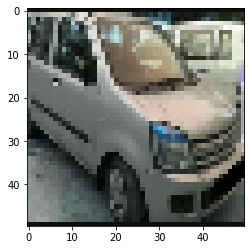

In [42]:
plt.imshow(wdata[2])

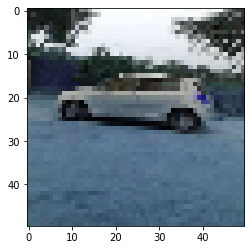

In [50]:
plt.imshow(sdata[2])

In [61]:
train_data=np.concatenate((sdata,wdata))
train_labels=np.append(swift_labels,wagonr_labels)

(<matplotlib.image.AxesImage at 0x7f6d289d3150>, (50, 50, 3))

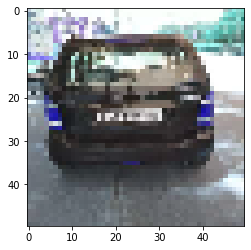

In [65]:
plt.imshow(train_data[1520]),train_data[1520].shape

In [67]:
val_data=np.concatenate((vsdata,vwdata))
val_labels=np.append(vswift_labels,vwagonr_labels)

In [68]:
train_data

array([[[[ 37,  45,  44],
         [ 41,  52,  55],
         [ 26,  40,  46],
         ...,
         [  9,  30,  21],
         [ 25,  50,  29],
         [ 29,  52,  37]],

        [[ 50,  56,  54],
         [ 59,  69,  72],
         [ 47,  61,  66],
         ...,
         [ 18,  39,  29],
         [ 27,  51,  31],
         [ 51,  73,  59]],

        [[ 73,  79,  74],
         [ 68,  76,  76],
         [ 61,  72,  76],
         ...,
         [ 33,  49,  42],
         [ 25,  44,  27],
         [ 17,  34,  22]],

        ...,

        [[ 94, 105, 113],
         [ 93, 104, 112],
         [ 94, 105, 112],
         ...,
         [ 74,  85,  93],
         [ 70,  81,  89],
         [ 72,  83,  91]],

        [[ 81,  92, 100],
         [ 91, 102, 110],
         [ 90, 101, 109],
         ...,
         [ 69,  80,  88],
         [ 73,  84,  92],
         [ 66,  77,  85]],

        [[ 92, 101, 109],
         [ 91, 101, 109],
         [ 95, 105, 115],
         ...,
         [ 62,  75,  83],
        

In [57]:
val_data[2]

array([[[223, 206, 203],
        [241, 224, 221],
        [250, 231, 230],
        ...,
        [233, 229, 224],
        [231, 228, 223],
        [243, 239, 234]],

       [[235, 218, 217],
        [239, 227, 225],
        [249, 241, 237],
        ...,
        [ 60,  57,  53],
        [117, 114, 110],
        [209, 206, 203]],

       [[ 16,  23,  15],
        [ 13,  20,  12],
        [ 29,  38,  30],
        ...,
        [217, 214, 210],
        [228, 225, 221],
        [226, 223, 219]],

       ...,

       [[101, 133, 132],
        [110, 146, 144],
        [105, 146, 143],
        ...,
        [116, 133, 153],
        [120, 136, 156],
        [124, 140, 160]],

       [[106, 145, 141],
        [ 97, 142, 134],
        [103, 153, 141],
        ...,
        [120, 136, 156],
        [118, 135, 154],
        [125, 141, 161]],

       [[ 63, 111, 100],
        [ 98, 141, 134],
        [104, 140, 136],
        ...,
        [115, 132, 148],
        [115, 132, 148],
        [115, 132, 148]]

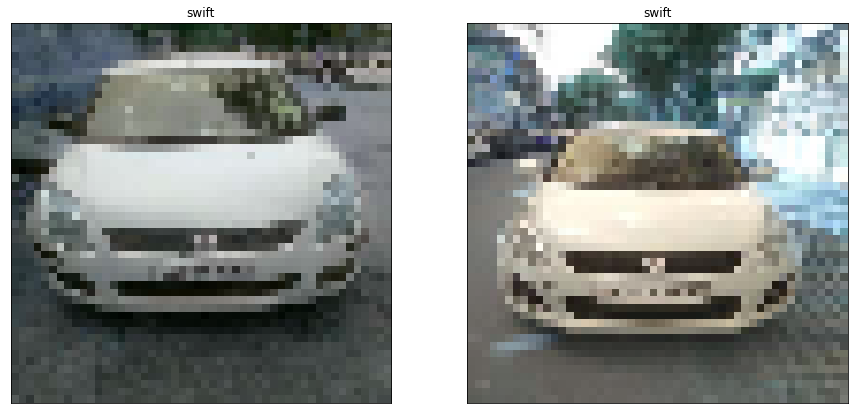

In [69]:
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(val_data[0])
plt.title(train_labels[0])
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(val_data[333])
plt.title(train_labels[333])
plt.xticks([]) , plt.yticks([])

plt.show()

In [70]:
n = np.arange(train_data.shape[0])
np.random.shuffle(n)
atrain_data = train_data[n]
alabels = train_labels[n]

In [48]:
n = np.arange(val_data.shape[0])
np.random.shuffle(n)
aval_data = val_data[n]
avallabels = val_labels[n]

In [82]:
from sklearn import preprocessing

In [83]:
label_encoder = preprocessing.LabelEncoder()
trlabels = label_encoder.fit_transform(alabels)
tvlabels = label_encoder.fit_transform(avallabels)

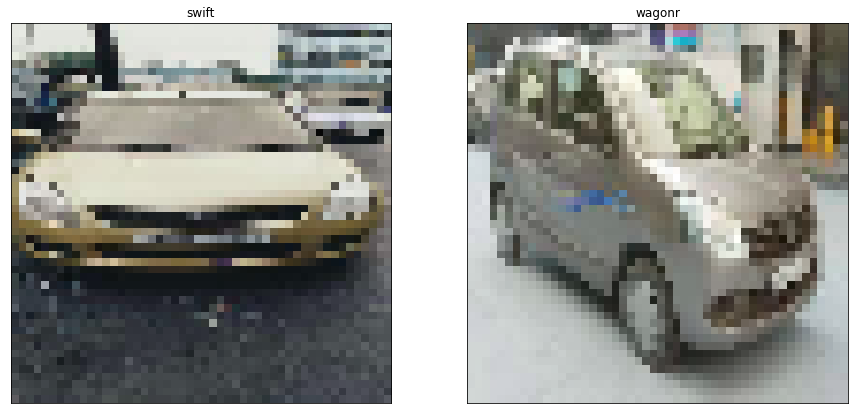

In [84]:
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(atrain_data[20])
plt.title(alabels[20])
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(atrain_data[1500])
plt.title(alabels[1500])
plt.xticks([]) , plt.yticks([])

plt.show()

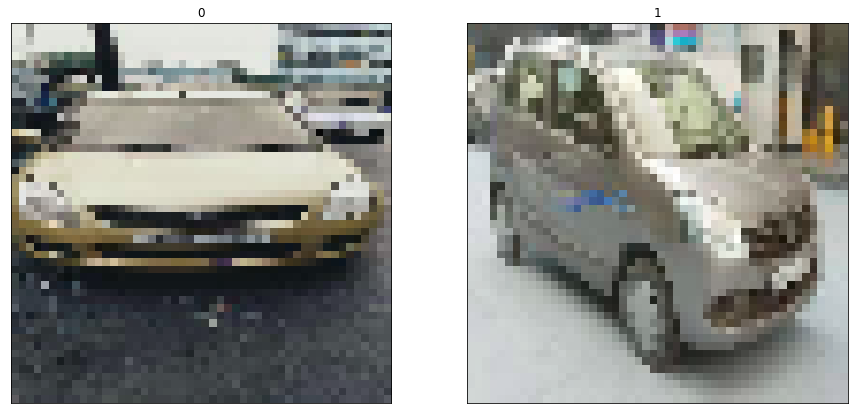

In [85]:
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(atrain_data[20])
plt.title(trlabels[20])
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(atrain_data[1500])
plt.title(trlabels[1500])
plt.xticks([]) , plt.yticks([])

plt.show()

In [86]:
from sklearn.model_selection import train_test_split

train_x , x_test , train_y , y_test = train_test_split(atrain_data , trlabels , 
                                            test_size = 0.2 ,
                                            random_state = 111)


In [87]:
train_x.shape,x_test.shape,train_y.shape,y_test.shape

((1920, 50, 50, 3), (480, 50, 50, 3), (1920,), (480,))

In [88]:
train_y

array([0, 1, 0, ..., 0, 1, 0])

In [94]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(50,50,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [97]:
    model = models.Sequential()
    model.add( layers.Conv2D(32, (3,3),  activation= 'relu', input_shape = (50, 50, 3)) )
    model.add(layers.MaxPooling2D((2,2)))

    model.add( layers.Conv2D(64, (3,3),  activation= 'relu') )
    model.add(layers.MaxPooling2D((2,2)))

    model.add( layers.Conv2D(128, (3,3),  activation= 'relu') )
    model.add(layers.MaxPooling2D((2,2)))

    model.add( layers.Conv2D(128, (3,3),  activation= 'relu') )
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation= 'relu'))
    model.add(layers.Dense(1, activation= 'sigmoid'))

    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [98]:
history = model.fit(train_x, train_y, batch_size=32,epochs=15,validation_data=(x_test, y_test))

Epoch 1/15
60/60 [==============================] - 1s 8ms/step - loss: 2.0144 - accuracy: 0.4938 - val_loss: 0.7074 - val_accuracy: 0.5104
Epoch 2/15
60/60 [==============================] - 0s 6ms/step - loss: 0.6490 - accuracy: 0.6047 - val_loss: 0.6257 - val_accuracy: 0.6250
Epoch 3/15
60/60 [==============================] - 0s 5ms/step - loss: 0.5709 - accuracy: 0.6979 - val_loss: 0.5061 - val_accuracy: 0.7521
Epoch 4/15
60/60 [==============================] - 0s 5ms/step - loss: 0.4672 - accuracy: 0.7833 - val_loss: 0.4834 - val_accuracy: 0.7708
Epoch 5/15
60/60 [==============================] - 0s 5ms/step - loss: 0.3615 - accuracy: 0.8349 - val_loss: 0.4991 - val_accuracy: 0.7937
Epoch 6/15
60/60 [==============================] - 0s 5ms/step - loss: 0.3060 - accuracy: 0.8698 - val_loss: 0.4800 - val_accuracy: 0.8062
Epoch 7/15
60/60 [==============================] - 0s 5ms/step - loss: 0.2288 - accuracy: 0.8990 - val_loss: 0.4640 - val_accuracy: 0.7979
Epoch 8/15
60/60 [==

In [102]:
score = model.evaluate(x_test , y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.7232195138931274
Test accuracy: 0.8479166626930237


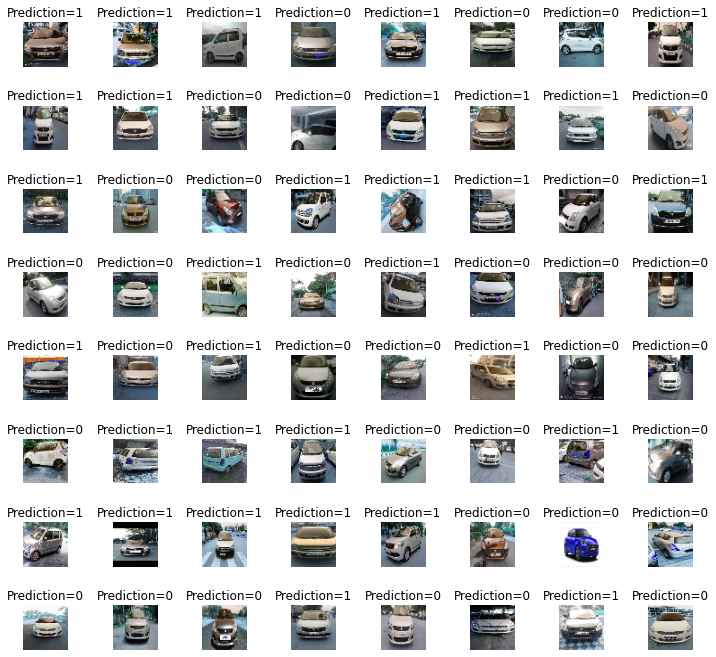

In [104]:
L=8
W=8
fig,axes=plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction={}'.format(y_test[i]))
    #axes[i].set_title('Prediction= {}\nTrue={}'.format(predictions[i].argmax(),tlabels[i]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [114]:
testwagonr_path = []
testwagonr_labels = []

for i in test_wr:
    testwagonr_labels.append("wagonr")
    print(i)
    testwagonr_path .append('/kaggle/input/cars-wagonr-swift/data/test/wagonr/'+i)
return testwagonr_path , testwagonr_labels

xhpwpdkhendd1-IN.jpg
0qbdfyhn15vy-IN.jpg
3co6h8l43s1v3-IN.jpg
wiy851vfx6rd3-IN.jpg
xvs2veaul3vm1-IN.jpg
k99wlxo70xdq-IN.jpg
6ltplcb538r71-IN.jpg
mga7e85qtb9c-IN.jpg
p76fjxixjrrn1-IN.jpg
6mkrab8n18xa-IN.jpg
ezt3il1wseu42-IN.jpg
rvkm23ijp0u-IN.jpg
p5lsya6d4hc61-IN.jpg
gp4tju40ajbg1-IN.jpg
73urp5tx947o-IN.jpg
4ar05jus2dhl3-IN.jpg
kosrxgo2y0k73-IN.jpg
9ml3kjnbqf831-IN.jpg
3c5xck9kr1he3-IN.jpg
onh0ospbv0fc2-IN.jpg
as9nqh6jkaoo3-IN.jpg
gjrlj8qkczxj2-IN.jpg
hdo2af7xsbok3-IN.jpg
4gciq162tb693-IN.jpg
fjccl3zbnv2g-IN.jpg
rzw4fm1t3jz6-IN.jpg
zmvnl40khr8v3-IN.jpg
7cs8iz79suyu-IN.jpg
ef8b7dj4utbj2-IN.jpg
k8dwbe0uijk3-IN.jpg
51ks8k0xzv4c2-IN.jpg
lavmcobi8ixs1-IN.jpg
13erqn7bls6f-IN.jpg
n348fnyhsg4z1-IN.jpg
v4gjvek69h9g1-IN.jpg
4hlgnona0s882-IN.jpg
4lues79o5zca-IN.jpg
9maecarbzedc2-IN.jpg
pfzppux2xqqn3-IN.jpg
1rypmjbd7rbe1-IN.jpg
bj45u0qn2pvj1-IN.jpg
jsgn77bv4qfs2-IN.jpg
1pi09aza2f4u3-IN.jpg
gkxsue3ba2f21-IN.jpg
jfscftnbavg7-IN.jpg
l6w2642bdwi22-IN.jpg
cztzrsnon18x1-IN.jpg
whzzm2z8069-IN.jpg
ra2g251u

SyntaxError: 'return' outside function (3473652122.py, line 8)

In [115]:
testwagonr_path[1]

'/kaggle/input/cars-wagonr-swift/data/test/wagonr/0qbdfyhn15vy-IN.jpg'

In [116]:
testswift_path = []
testswift_labels = []

for i in test_swift:
    testswift_labels.append("swift")
    print(i)
    testswift_path.append('/kaggle/input/cars-wagonr-swift/data/test/swift/'+i)
return testswift_path, testswift_labels

ck3f7fhq1grp2-IN.jpg
2e6wjwkcjikz1-IN.jpg
oy3u4apdyej51-IN.jpg
np6yex8s3n6p3-IN.jpg
xbl4oxegvzdt-IN.jpg
e27izuil991s2-IN.jpg
714gqhe1qwul2-IN.jpg
bcvxrc0og5ah2-IN.jpg
elr9zae1qs75-IN.jpg
mmr3her4t1zn3-IN.jpg
ner7q6wk8ipz-IN.jpg
bydmv98ob4rr1-IN.jpg
6l24cc6vq0w61-IN.jpg
ji3dam6njz8p2-IN.jpg
taruj2a1b49f1-IN.jpg
zevf6828yfxj3-IN.jpg
g20briu8jdkm1-IN.jpg
qu8yf6qnjaj9-IN.jpg
bswg60yhpxps3-IN.jpg
9myusl9937bu3-IN.jpg
4ix0ifpmfsxi3-IN.jpg
pj7wc4wmrguq3-IN.jpg
g9uhfr2fyyqo-IN.jpg
c87qkwjizhsk2-IN.jpg
le7jczjiinag2-IN.jpg
app21sntflsw2-IN.jpg
ykfcgh7cokjr-IN.jpg
le0t7h83vt9n3-IN.jpg
l8pwlyhq9y2t2-IN.jpg
uq8xto4oukyc1-IN.jpg
6mu2iwzoaakm-IN.jpg
pj6ywn4o0y893-IN.jpg
88259w56dzpt2-IN.jpg
ghye4p8a6li43-IN.jpg
mtcp342neyc82-IN.jpg
gbj98f08bq232-IN.jpg
qjm6yojwak91-IN.jpg
c742ggh43uyu2-IN.jpg
gv7ye6ofavua1-IN.jpg
x52yq56y4dyj3-IN.jpg
k81icsbnxn932-IN.jpg
bmo8p3joynil3-IN.jpg
n9nkfixq2im71-IN.jpg
pr5cm87jy5zh3-IN.jpg
0h25y93uxltq2-IN.jpg
sl0glfh7wyte3-IN.jpg
rv325bu8i8vu1-IN.jpg
5azdrjxkvtdf-IN.jpg
h

SyntaxError: 'return' outside function (2624300260.py, line 8)

In [117]:
testvsdata = []
testwdata=[]

In [118]:
for i in testswift_path:    
    image=cv2.imread(i)
    #image = cv2.fromarray(image , 'RGB')
    image= cv2.resize(image,dim)
    testvsdata.append(image)  

In [119]:
for i in testwagonr_path:    
    image=cv2.imread(i)
    #image = cv2.fromarray(image , 'RGB')
    image= cv2.resize(image,dim)
    testwdata.append(image) 

In [120]:
test_data=np.concatenate((testvsdata,testwdata))
test_labels=np.append(testswift_labels,testwagonr_labels)

In [121]:
test_data.shape

(800, 50, 50, 3)

In [122]:
predictions = model.predict(test_data)

In [123]:
predictions

array([[8.88488472e-01],
       [1.27047896e-01],
       [3.53421929e-05],
       [8.30466291e-08],
       [9.69885886e-01],
       [6.10062943e-06],
       [2.29250208e-01],
       [8.66713189e-03],
       [6.10876232e-05],
       [4.18917736e-08],
       [2.88375430e-02],
       [7.12798685e-02],
       [4.39434843e-05],
       [1.22039507e-08],
       [1.32748282e-05],
       [8.64570558e-01],
       [1.20180437e-06],
       [5.12693226e-01],
       [3.65037978e-01],
       [1.88441249e-03],
       [1.55408110e-04],
       [5.06695397e-02],
       [9.96609986e-01],
       [9.26589472e-09],
       [8.51225972e-01],
       [2.14126794e-05],
       [1.01485418e-03],
       [8.87219270e-04],
       [4.83527954e-04],
       [1.83563679e-02],
       [6.63951784e-03],
       [1.72836197e-04],
       [7.35869398e-04],
       [7.41050962e-06],
       [6.71357499e-04],
       [8.08586359e-01],
       [6.67489231e-01],
       [5.85252404e-01],
       [5.96251637e-02],
       [3.18994373e-02],


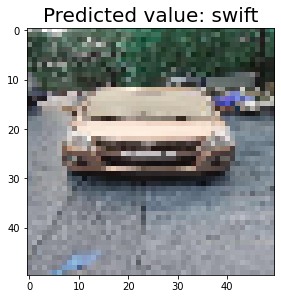

In [125]:

plt.figure(figsize=[10,10])

class_names=('swift','wagonr')

plt.subplot(2,2,1) 
n = 543
plt.imshow(test_data[n].reshape(50, 50, -1), cmap=plt.cm.binary) 
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)